#Notebook 2 del Proyecto Integrador de Aprendizaje
Equipo No.2

Integrantes:

> Iran Alexandra Arevalo Rodriguez--------1942711

> Marcela Morales Guzmán--------------------1853369

> Teodoro D. A. Charles Maldonado-------1991867


In [21]:
#librerias
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import glob
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.datasets import mnist

# Preprocesamiento

En esta sección se importan las imágenes de nuestro dataset y se reescalan para usarlas mas adelante en la seccion de predicción


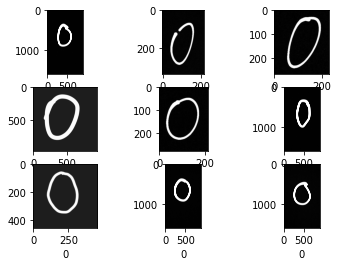

In [22]:
array_0 = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob("/content/imgs_3/0*")]
ar_label0 = ['0' for file in array_0]
array_1 = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob("/content/imgs_3/1*")]
ar_label1 = ['1' for file in array_1]
array_2 = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob("/content/imgs_3/2*")]
ar_label2 = ['2' for file in array_2]
array_3 = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob("/content/imgs_3/3*")]
ar_label3 = ['3' for file in array_3]
array_4 = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob("/content/imgs_3/4*")]
ar_label4 = ['4' for file in array_4]
array_5 = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob("/content/imgs_3/5*")]
ar_label5 = ['5' for file in array_5]
array_6 = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob("/content/imgs_3/6*")]
ar_label6 = ['6' for file in array_6]
array_7 = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob("/content/imgs_3/7*")]
ar_label7 = ['7' for file in array_7]
array_8 = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob("/content/imgs_3/8*")]
ar_label8 = ['8' for file in array_8]
array_9 = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob("/content/imgs_3/9*")]
ar_label9 = ['9' for file in array_9]

array_all = array_0+array_1+array_2+array_3+array_4+array_5+array_6+array_7+array_8+array_9
ar_label = ar_label0+ar_label1+ar_label2+ar_label3+ar_label4+ar_label5+ar_label6+ar_label7+ar_label8+ar_label9

for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(array_all[i], cmap=plt.get_cmap('gray'))
	plt.xlabel(ar_label[i])
plt.show()

300


Text(0.5, 0, '0')

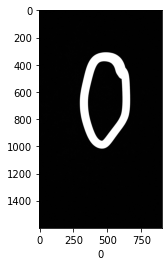

In [23]:
#corroborar
print(len(array_all))
plt.imshow(array_all[5], cmap='gray')
plt.xlabel(ar_label[5])

Total files after resize: 300


Text(0.5, 0, '0')

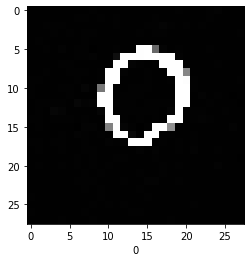

In [24]:
#toma todas las imagenes de la carpeta, aplica resize y contraste.
# array_raw = []
# print("Total files before upload:",len(array_raw))
# array_raw = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob("/content/imgs/*.jp*g")]
#array_raw = [cv2.bitwise_not(file) for file in array_raw] # no se requiere, todas las imagenes son letra blanca y fondo negro
# print("Total files before resize:",len(array_raw))
# plt.imshow(array_raw[5], cmap='gray')
# TODO LO DE ARRIBA ES PARTE DE LA ACT3, PERO COMO EN ESTE CASO, ARRAY_RAW = ARRAY_ALL, YA NO SE REQUIERE
array_resized = [cv2.resize(file, (28,28), interpolation=cv2.INTER_LINEAR) for file in array_all]
print("Total files after resize:",len(array_resized))

plt.imshow(array_resized[5], cmap='gray')
plt.xlabel(ar_label[5])

Text(0.5, 0, '1')

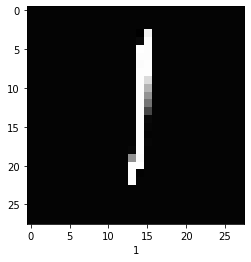

In [188]:
## visualizacion del preprocesado
plt.imshow(array_resized[34], cmap='gray')
plt.xlabel(ar_label[34])

Text(0.5, 0, '4')

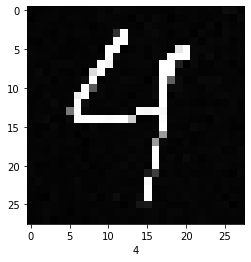

In [190]:
## visualizacion del preprocesado
plt.imshow(array_resized[145], cmap='gray')
plt.xlabel(ar_label[145])

300
300


Text(0.5, 0, '1')

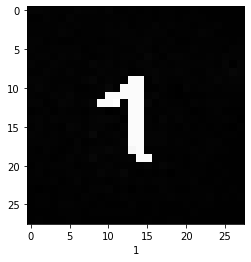

In [25]:
#Procesamieniento de las imagenes totales y guardandolas en la variable de test
test_imgs = []
test_lbs = []
i = 0
j = 0
for i in range(len(array_resized)):
  test_imgs.append(array_resized[i])
  test_lbs.append(ar_label[i])

print(len(test_imgs))
print(len(test_lbs))
plt.imshow(test_imgs[54], cmap='gray')
plt.xlabel(test_lbs[54])

In [26]:
# convierte los arrays en numpy arrays porque asi lo requiere la funcion model.fit()
test_lbs = np.array(test_lbs)
test_imgs = np.array(test_imgs)

# convierte la variable dependiente de forma categorica a forma numerica, porque asi lo requiere la funcion model.fit()
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
test_lbs = lb.fit_transform(test_lbs)

In [27]:
#transformacion de nuestro data set escalando los valores en un rango de 0 a 1
test_imgs = test_imgs / 255.0

In [173]:
#descarga del dataset de MNIST para el entrenamiento de la RNAC
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0


# Estructura y entrenamiento de Red Neuronal Artificial Convolusional (RNAC)

En esta sección se establece la cantidad de capas de convolusión y capas de aprendizaje para nuestra red neuronal artificial convolusional. 
En nuestra RNAC se utilizaron 2 capas densas

In [174]:
#definicion de la base convolucional
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [175]:
#creacion de las capas densas
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [176]:
#entrenamiento
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels)) 

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 41s 22ms/step - loss: 0.1427 - accuracy: 0.9556 - val_loss: 0.0604 - val_accuracy: 0.9826
Epoch 2/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0467 - accuracy: 0.9859 - val_loss: 0.0434 - val_accuracy: 0.9872
Epoch 3/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0334 - accuracy: 0.9892 - val_loss: 0.0305 - val_accuracy: 0.9906
Epoch 4/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0241 - accuracy: 0.9922 - val_loss: 0.0373 - val_accuracy: 0.9884
Epoch 5/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0202 - accuracy: 0.9934 - val_loss: 0.0279 - val_accuracy: 0.9916
Epoch 6/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0162 - accuracy: 0.9947 - val_loss: 0.0321 - val_accuracy: 0.9900
Epoch 7/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0136 - accuracy: 0.9957 - val_loss: 0.0254 - val_accura

# Resultados de exactitud de la RNAC
Podemos observar que nuestra RNAC tiene un accuracy del 99% entonces podemos concluir que exite el riesgo de que nuestra red tenga overfiting

313/313 - 2s - loss: 0.0323 - accuracy: 0.9913 - 2s/epoch - 6ms/step


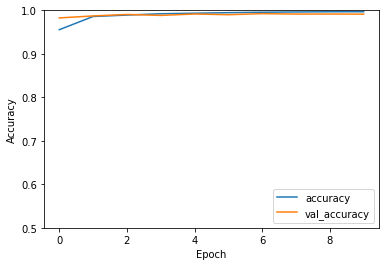

In [177]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,test_labels,verbose=2) # del codigo original se reemplaza test_images de la libreria mnist por test_imgs de nuestra base, y lbs.

In [178]:
print(test_acc)

0.9912999868392944


# Predicciones con la RNAC entrenada. 
 Se muestran al menos 3 predicciones de dígitos del 0 al 9.

In [179]:
predictions = model.predict(test_imgs)

In [183]:
x = np.argmax(predictions[201])
y = test_lbs[201]
x = str(x)
y = str(y)
print("La red dice que la imagen es clase " + x + " y la clase verdadera es: " + y )

La red dice que la imagen es clase 6 y la clase verdadera es: 6


In [48]:
x = np.argmax(predictions[30])
y = test_lbs[30]
x = str(x)
y = str(y)
print("La red dice que la imagen es clase " + x + " y la clase verdadera es: " + y )

La red dice que la imagen es clase 1 y la clase verdadera es: 1


In [181]:
x = np.argmax(predictions[129])
y = test_lbs[129]
x = str(x)
y = str(y)
print("La red dice que la imagen es clase " + x + " y la clase verdadera es: " + y )

La red dice que la imagen es clase 4 y la clase verdadera es: 4
